In [204]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPClassifier #accuracy 1
from sklearn.neighbors import KNeighborsClassifier #1
from sklearn.linear_model import LogisticRegression #1

In [205]:
test_dataset = 'optdigits-1-tes.csv'
train_dataset = 'optdigits-1-tra.csv'

test_dataset = pd.read_csv(test_dataset, delimiter=',')
train_dataset = pd.read_csv(train_dataset, delimiter=',')

#print test_dataset.shape
#print train_dataset.shape
#test_dataset.head()

XTest = test_dataset.drop(test_dataset.columns[-1], axis = 1)
yTest = test_dataset[test_dataset.columns[-1]]
XTrain = train_dataset.drop(train_dataset.columns[-1], axis=1)
yTrain = train_dataset[train_dataset.columns[-1]]
#print yTrain

In [217]:
#We test various models on our network
clf = make_pipeline(StandardScaler(), PCA(n_components=2), MLPClassifier(hidden_layer_sizes=(2),solver='sgd',learning_rate_init=0.01,max_iter=200))
#clf = KNeighborsClassifier()
#clf = MLPClassifier(hidden_layer_sizes=(16),solver='sgd',learning_rate_init=0.01,max_iter=200)
#clf = LogisticRegression(solver = 'lbfgs')
clf.fit(XTrain, yTrain)
predictions = clf.predict(XTest)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


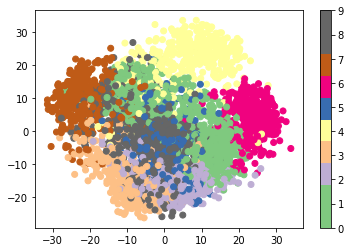

In [218]:
pca = clf.named_steps['pca']
print pca

scaled = pca.fit_transform(XTrain)

plt.scatter(scaled[:, 0], scaled[:, 1], c=yTrain, cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar();

In [219]:
predictions = pd.DataFrame(yTest)

print 'Accuracy is:', accuracy_score(yTest, predictions)
print 'How predictions should look:'
print yTest
print '\n'
print 'How predictions look:'
print predictions
print '\n'
print 'Errors are:'
print abs(yTest-predictions)
print 'No of errors is:', np.sum(abs(yTest-predictions))
print 'Confusion matrix is:'
print confusion_matrix(yTest, predictions)

Accuracy is: 1.0
How predictions should look:
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9       0
10      1
11      2
12      3
13      4
14      5
15      6
16      7
17      8
18      9
19      0
20      1
21      2
22      3
23      4
24      5
25      6
26      7
27      8
28      9
29      0
       ..
1766    4
1767    0
1768    5
1769    3
1770    6
1771    9
1772    6
1773    1
1774    7
1775    5
1776    4
1777    4
1778    7
1779    2
1780    8
1781    2
1782    2
1783    5
1784    7
1785    9
1786    5
1787    4
1788    8
1789    8
1790    4
1791    9
1792    0
1793    8
1794    9
1795    8
Name: 0.29, Length: 1796, dtype: int64


How predictions look:
      0.29
0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9        0
10       1
11       2
12       3
13       4
14       5
15       6
16       7
17       8
18       9
19       0
20       1
21       2
22       3
23       4
24    

No of errors is: 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
1767    0.0
1768    0.0
1769    0.0
1770    0.0
1771    0.0
1772    0.0
1773    0.0
1774    0.0
1775    0.0
1776    0.0
1777    0.0
1778    0.0
1779    0.0
1780    0.0
1781    0.0
1782    0.0
1783    0.0
1784    0.0
1785    0.0
1786    0.0
1787    0.0
1788    0.0
1789    0.0
1790    0.0
1791    0.0
1792    0.0
1793    0.0
1794    0.0
1795    0.0
0.29    0.0
Length: 1797, dtype: float64
Confusion matrix is:
[[177   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0